In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
sb.set()
import scipy.optimize as optimization
from datetime import datetime as dt
from datetime import timedelta
from matplotlib import rcParams
rcParams['figure.figsize'] = 10,6
import math
import scipy.stats
import matplotlib.pyplot as plt
import time
from ipywidgets import Checkbox
import pandas_datareader as pdr
import AllDefFunctions as functions
import warnings
warnings.filterwarnings("ignore")

### 1. Select stock you are intrested in.

We can distinguish general markets as:
- equities
- commodities
- precious metals
- cryptocurrencies
- bonds

If you want to built long-term portfolio which is resistant to prosperity cycles you should consider selecting at least one stock for each market types. Thanks that you will elimitane systematic risk and let your welth grow independently. 

My modern portfolio will not only help you diversify your portefl but also find the best proportion of your assets to achieve the highest possible rate of return with the lowest possible investment risk.  


If you do not know the stocks by tickers check short description [here](http://localhost:8888/notebooks/ModernPortfolio_project/TryModernPortfolioYourself/1.CheckFoundAveliableToAnalysis.ipynb)

In [45]:
# Create checkbox listo to choese
SPX_= Checkbox(description = 'CSPX.L')
BTC_ = Checkbox(description = 'BTC-USD')
IEF_ = Checkbox(description = 'IEF')
FILL_ = Checkbox(description = 'FILL')
PALL_ = Checkbox(description = 'PALL')
HighestSR= Checkbox(description = 'Highest Sharp Ratio')
MyWallet = Checkbox(description = 'My Choice')
quaterly = Checkbox(description = 'quaterly')
yearly = Checkbox(description = 'yearly')

In [46]:
display(SPX_, BTC_, IEF_, FILL_, PALL_)

Checkbox(value=False, description='CSPX.L')

Checkbox(value=False, description='BTC-USD')

Checkbox(value=False, description='IEF')

Checkbox(value=False, description='FILL')

Checkbox(value=False, description='PALL')

In [47]:
tickers = functions.choese_stock(SPX_, BTC_, IEF_, FILL_, PALL_)

Your choice: ['CSPX.L', 'BTC-USD', 'IEF', 'FILL', 'PALL']


### 2. Select period of analysis

Remember that last aveliable end date is day before today

In [48]:
pd.to_datetime(dt.today())

Timestamp('2022-05-10 16:30:29.947601')

In [49]:
start = '2012-04-01' # FORMAT: 'yyyy-mm-dd'
end = '2022-05-07'   # FORMAT: 'yyyy-mm-dd'

### 3. Check if given period is aveliable

some assets may be listed later than the period you have selected. At this stage we want to check if the date you have selected is available. If NOT - the algorithm will tell you which market it is and when the earliest data is available.

In [50]:
new_start = functions.find_first_date_from_choesen_stosks(start, end, tickers)

First aveliable date to comapre stocks is 2014-09-17 00:00:00. This stock is BTC-USD.
---------------------------------------------------
If this is to short period, You can always unmark stock with the lowest start date aveliable


### 4. Check day of the week

Usually stocks are listed in weekdays, so we nedd to be sure that date that been choesen is not listed at weekend. Algo will find the best fitted day for You. If start date is wrong it will move forward to find aveliable date. If end date is wrong it will take previous date aveliable

Start date

In [51]:
start = functions.check_start_date(new_start)
start

Timestamp('2014-09-17 00:00:00')

End date

In [52]:
end = functions.check_end_date(end)
end

Timestamp('2022-05-06 00:00:00')

### 5. Prepare data

As known traditional markets are listed only in weekdays, but in my modern portfolio model you can choose cryptocarecy stocks also, where days off does not exist. In order for next steps of analysis, all stocks must be in the same date range. I decided not to cut cryptocurrency persion, but instead I added the closing prices to traditional markets for weekend periods (Sat, Sun). The values for weekend is last listed value at week day (friday). In the future I will add funtionality which let's you make that decision.

In [53]:
df = functions.createPrepDataFrame(tickers, start, end, functions.PasteMissingRows)

### 6. Markowitz Portfolio symulation

Here we simulate thousands of portfolio with different weights of stocks. For eg. You could invest in chosen stocks with all equal weights, so if you selected 'BTC', 'SPX500', 'FILL and 'ETL' your equal weights will be [0.25, 0.25, 0.25, 0.25] multiplied by cash you are going to invest. Markowitz portfolio symulate portfolios with different wages for egx. [1,0,0,0], wchih mean that you invest all money in BTC then [0.9, 0.1,0,0] meaning of 90% for BTC ant 10 % for SPX etc. 


The process will be repeated x times. X mean iterations, where the minimum should be 20 000, but it depend on period and quantity of stock you selected before. The simulation might take a while, but the tip is: 
- if it took less than 10 second you should increase iterations,
- if 30 secnond pass and you still have not result, just decrease iterations.

**Choese iterations:**

In [54]:
iterations = 30000

In [55]:
results, returns, vol, weights = functions.symulatePortfoliosWeights(df, iterations, functions.calculate_N, functions.calculate_log_rets, functions.gen_weights, functions.calculate_returns, functions.calculate_volatility)

### See results of your simulation on the plot

The chart describe expected return and volatility for given weights of assets. As you can see the higher return is, the higher volatility you can expect. The main thing is to keep good balance between this two values, trying to take maximum profit 

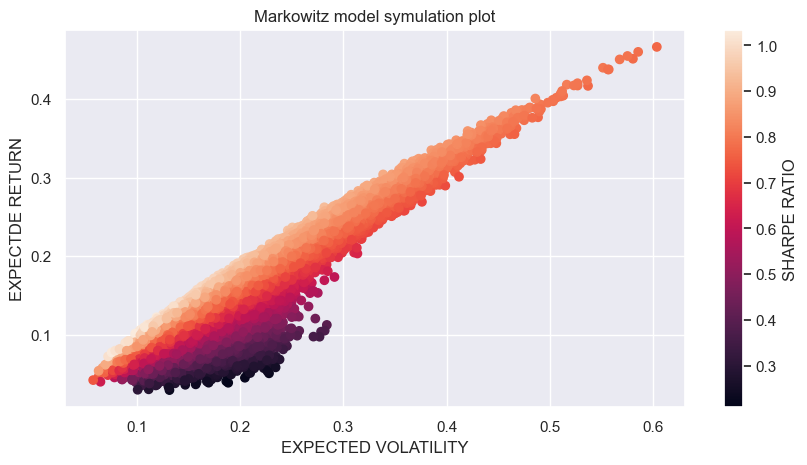

In [56]:
functions.createResultsPlot(results)

### 7. Sharp Ratio

We simuluate thousends of portfolios, but **which one is the best?** To anserw that question you should be awere of **Sharp Ratio**, which is calculated by dividind expected annual return by expected annual volotality for each portfolio. The one with the highest Sharp Ratio has the best proportion of risk/reward indicator. Let's check your Sharp Ratio then!

In [57]:
maxSR, expected_vol, expected_ret, new_weights = functions.findHighestSharpRatio(results);

The highest sharp ratio for selected assets is 1.0344
Expected logaritmic annual return: 0.1018
Expected annual volatility: 0.0984
Weights of wallet: [0.29964916 0.10238931 0.57612549 0.00880098 0.01303507]


In [58]:
df.columns

Index(['CSPX.L', 'BTC-USD', 'IEF', 'FILL', 'PALL'], dtype='object')

##### See Sharp Ratio on plot

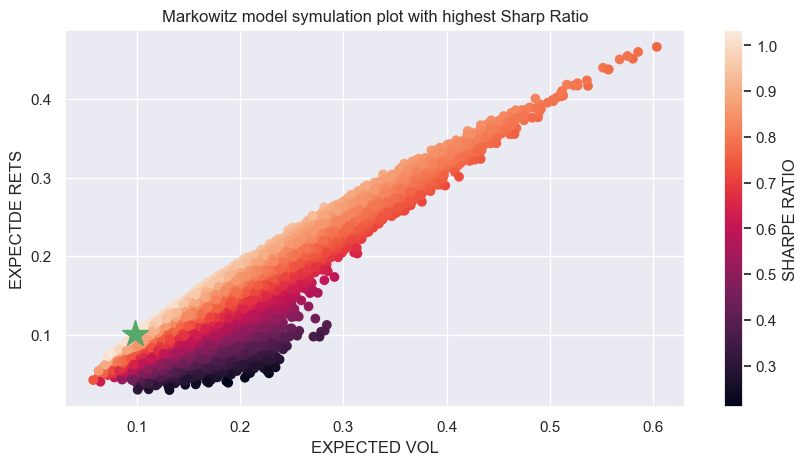

In [59]:
functions.createResultsPlot2(results, expected_vol, expected_ret)

### 8. Find the best portfolio by risk appetite

All investors has slightly differen risk appetite. The more you want to earn, the more risk u must take. Some investor could take higher risk in order to get higher profit/return. 

**Expected Volatility** describe in average how your investment will change annualy. It's also called standard deviation. 

**Example:** Let's say that your anual log return is 10% and in same way the volatility is 15%. It means that before you gain 10% profit, your portfolio will go up and down in average of 15%. So it could go up 20%, then downs 10%, then up and so on untill the investment end.

**Note:** You need to be awere that here we work on logaritmic return, but usually more important is simple returns. Becouse of that you must take into account the fact that volotality calculated by log returns might be lower than simple one. If you do not know what to choese, just write whatever you think and come back again after you get to the end of analysis. I am sure that it will be more clear to You then.

In [60]:
# Example of how to wtire value
# 10% - 0.1
# 35% - 0.35
max_vol_yearly = 0.25 # 0.00

In [61]:
my_rets, my_vol, sharpRatio, bestWeights = functions.findBestWeightsByMaxVol(results, max_vol_yearly)

The best portfolio consistent with the assumed annual volatility can achieve an average log return of 23.28%
Proposed portfolio weights: [0.54210198 0.28475937 0.08951298 0.00535551 0.07827016]
Expected sharp ratio: 0.9455673695280756


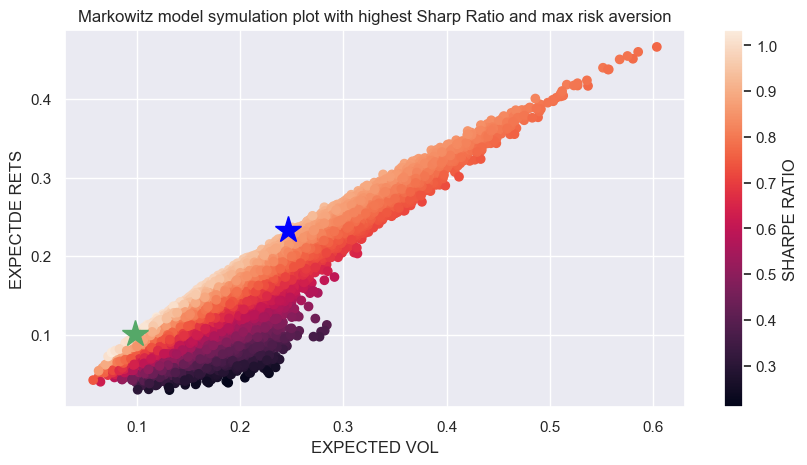

In [62]:
functions.createResultsPlot3(results, expected_vol, expected_ret, my_vol, my_rets)

In [63]:
summary = functions.create_summary(maxSR, sharpRatio, expected_vol, my_vol, expected_ret, my_rets, new_weights, bestWeights)
summary

,Sharp Ratio,Expected volatility,Expected log return,Wallet weights
Wallet,,,,
Highest Sharp Ratio,1.034355,0.098412,0.101793,"[0.2996491570697426, 0.10238930903696983, 0.57..."
My Choice,0.945567,0.246234,0.232831,"[0.5421019767123973, 0.2847593677401931, 0.089..."


**Select portfolio You want to analyze**

In [64]:
display(HighestSR, MyWallet)

Checkbox(value=False, description='Highest Sharp Ratio')

Checkbox(value=False, description='My Choice')

In [65]:
tickers = functions.choese_wallet(HighestSR, MyWallet)

Your choice: ['Highest Sharp Ratio']


###### Weights of your portfolio

In [66]:
weights = functions.create_weightsDataFrame(summary, tickers, df)
weights

,CSPX.L,BTC-USD,IEF,FILL,PALL
0,0.2996491570697426,0.10238930903696983,0.5761254912050467,0.008800976105368515,0.013035066582872283


### 9. Historical performence of your portfolio


comment---comment---comment---comment---comment---comment---comment---comment---comment---comment---

In [67]:
investmentAmt = 100000

In [68]:
cum_returns, buyAmt = functions.prepare_data(investmentAmt, df, weights)

Highest profitable stocks is BTC-USD


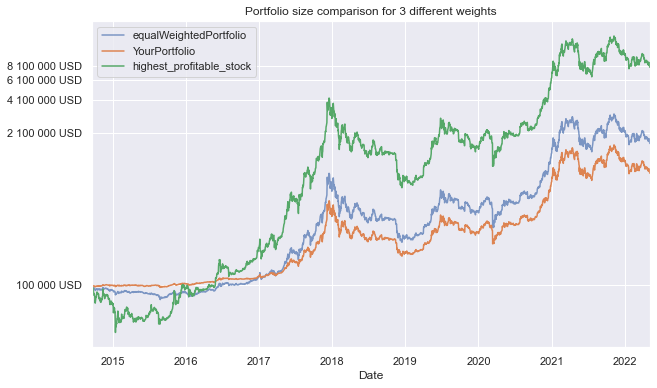

In [69]:
functions.comparePortfolios_Plot(investmentAmt, cum_returns, max_y = 1.2, freq=20);

### 10. Proportion of your portfolio over time

As you know some of stocks might grow faster than another. That is why the weights you started with may change. Let's check weights of assets in portfolio over analysis period!

In [70]:
proportions = functions.calculate_proportions(cum_returns, df, weights)

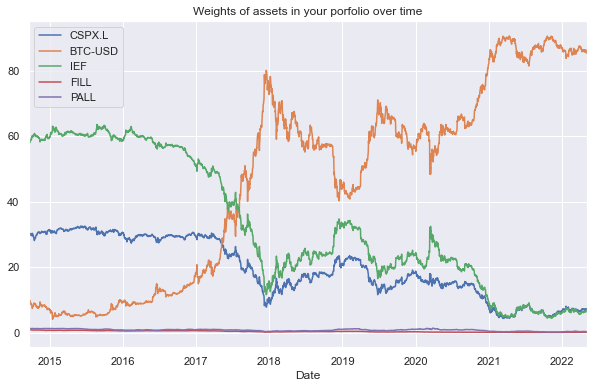

In [71]:
functions.plot_proportions(proportions)

**Note:** If y-axis on the chart is too thick, increase freq paramiter, which as a default is 5

If chart above does not presents horizontal straight lines, that means that your wallets lost weights established at the beginning

### 11. Rebalanceing

Markowitz model calculated annual returns and volotality base on daily log returns. Obviously it does not take into account the cummulated returns, which is good, becouse it helps maintain objectivity. So, if we want to create portfolio base on markowitz model we must keep portfolio weights at a fixed level at all times.

Unfortunetly, there is no point to rebalance our portfolio whenever the weights sligtly change, mainly becouse of transaction cost and taxes. So we presumed that rebalancing should not be done more then one time in Quater (3 months) and not less than once a Year.

**Select how often you want to make rebalancing of portfolio**

In [72]:
display(quaterly, yearly)

Checkbox(value=False, description='quaterly')

Checkbox(value=False, description='yearly')

In [73]:
choesen_frq = functions.choese_rebalancing_frquency(quaterly, yearly)

Your choesen frequency: ['quaterly']


In [74]:
rebalancing_dates = functions.create_dates_for_rebalancing(df, frequency=choesen_frq[0])

In this period you could make 30 rebalancing


In [75]:
portfolio_value, new_proportions = functions.create_new_wallet_with_rebalanceing(df,weights, rebalancing_dates, buyAmt, cum_returns, proportions)

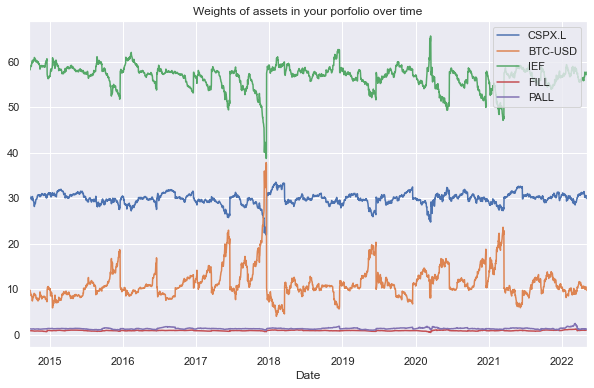

In [76]:
functions.plot_proportions(new_proportions)

If the graph above does not remaind you Heart Rate Variability then you should consider increasing the frequency of rebalancing or just go to the next step and check the summary

In [77]:
freq = 5

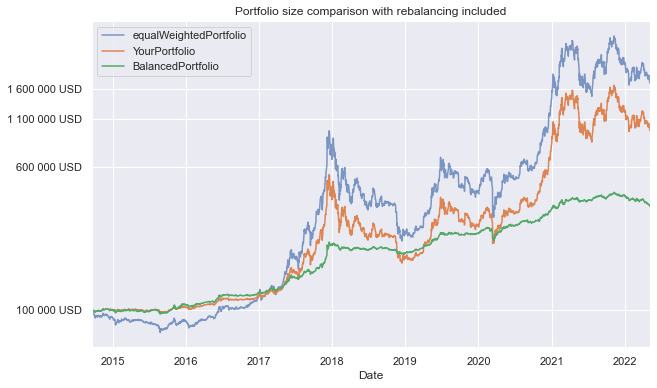

In [78]:
functions.compare_balance_portfolio_vs_previous(investmentAmt, portfolio_value, cum_returns, freq=freq) 

**Note:** If y-axis on the chart is too thick, increase freq paramiter, which as a default is 5

In [79]:
all_portfolios = functions.create_table_with_all_portfolios(cum_returns, portfolio_value)

### 12. Summary

Below you can see table with summary of 3 portfolios:
- equal weights, where all assets haave the same value in the begining
- your portfolio, where all assets have previously selected weights in the begining
- your balanced portfolio, where all assets have fixed proportions in each rebalancing period 

**Max dropdowns** show how much each portfolio drop for given period

In [80]:
functions.dropdown_summary(all_portfolios)

MAx dropdowns summary:


,Month,Quater,Year
equalWeightedPortfolio,-54.02%,-56.1%,-74.77%
YourPortfolio,-47.44%,-49.24%,-66.91%
YourRebalancedPortfolio,-14.97%,-8.89%,-13.6%


**Returns** is an average/annual profit investor make by each portfolio

In [81]:
functions.returns_summary(all_portfolios, investmentAmt)

Returns Summary:


,Monthly,Quaterly,Yearly
equalWeightedPortfolio,3.11%,9.61%,45.07%
YourPortfolio,2.45%,7.52%,34.19%
YourRebalancedPortfolio,1.41%,4.28%,18.51%


**Note_1:** If Max dropdowns for your portfolio are too hight you can:

- select more stocks to your portfolio in setp nr. 1
- decrease max volotality in step nr. 8
- change rebalancing frequency for 'quaterly' if you haven't done already in step nr. 11